instalações


In [ ]:
!pip uninstall -y tensorflow
!pip install tensorflow-gpu==2.0

Found existing installation: tensorflow 2.8.2+zzzcolab20220527125636
Uninstalling tensorflow-2.8.2+zzzcolab20220527125636:
  Successfully uninstalled tensorflow-2.8.2+zzzcolab20220527125636
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 380.8 MB 40 kB/s 
     |████████████████████████████████| 449 kB 54.6 MB/s 
     |████████████████████████████████| 50 kB 7.5 MB/s 
     |████████████████████████████████| 3.8 MB 39.5 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=6228b87ccb125b8108f21129139a10ca714c514fa484c5581adeef95be3d1945
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8

importando as bibliotecas

In [ ]:
import numpy as np
import datetime
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import pandas as pd
from numpy.lib import scimath as SM
import matplotlib.pyplot as plt
from termcolor import colored

pré-processamento 

In [ ]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [ ]:
amostragem  = pd.read_csv("/content/amostragem_compressiva.csv",header = None )

Normalizando as imagens, como os vetores estão com numeros diversos e uma rede neural trabalha melhor com números entre 0 e 1, precisamos dessa 'normalização'

In [ ]:
amostragem = amostragem.to_numpy()

In [ ]:
X_train = X_train / 255.0

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test = X_test / 255.0

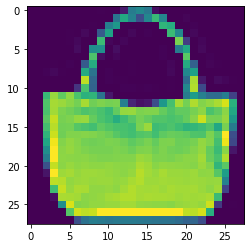

In [ ]:
plt.imshow(X_train[100])

remodelar os vetores para a primeira camada da nossa rede neural

In [ ]:
X_train = X_train.reshape(-1, 28*28)

In [ ]:
X_test = X_test.reshape(-1, 28*28)

In [ ]:
 X_train.shape

(60000, 784)

reduzindo o vetor entrada

In [ ]:
mod_X_train = X_train.dot(amostragem)

In [ ]:
mod_X_test = X_test.dot(amostragem)

In [ ]:
mod_X_train.shape

(60000, 200)

In [ ]:
mod_X_test.shape

(10000, 200)

In [ ]:
mod_X_train = mod_X_train.reshape(60000,20,10)

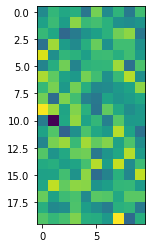

In [ ]:
plt.imshow(mod_X_train[100])

Criando a rede neural 

In [ ]:
model = tf.keras.models.Sequential()

In [ ]:
model

camada oculta e ligando a camada de entrada

In [ ]:
model.add(tf.keras.layers.Dense(units=128, activation='relu', input_shape=(200, )))

função dropout

In [ ]:
model.add(tf.keras.layers.Dropout(0.2))

camada de saída

In [ ]:
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

compilando o model

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               25728     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 27,018
Trainable params: 27,018
Non-trainable params: 0
_________________________________________________________________


treinando o model

In [ ]:
model.fit(mod_X_train, y_train, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.6015 - sparse_categorical_accuracy: 0.7908
Epoch 2/10
60000/60000 [==============================] - 4s 59us/sample - loss: 0.4422 - sparse_categorical_accuracy: 0.8407
Epoch 3/10
60000/60000 [==============================] - 4s 61us/sample - loss: 0.4038 - sparse_categorical_accuracy: 0.8539
Epoch 4/10
60000/60000 [==============================] - 4s 59us/sample - loss: 0.3809 - sparse_categorical_accuracy: 0.8617
Epoch 5/10
60000/60000 [==============================] - 3s 58us/sample - loss: 0.3647 - sparse_categorical_accuracy: 0.8673
Epoch 6/10
60000/60000 [==============================] - 4s 59us/sample - loss: 0.3530 - sparse_categorical_accuracy: 0.8715
Epoch 7/10
60000/60000 [==============================] - 3s 58us/sample - loss: 0.3434 - sparse_categorical_accuracy: 0.8736
Epoch 8/10
60000/60000 [==============================] - 3s 58us/sample - loss: 0.3341 - spars

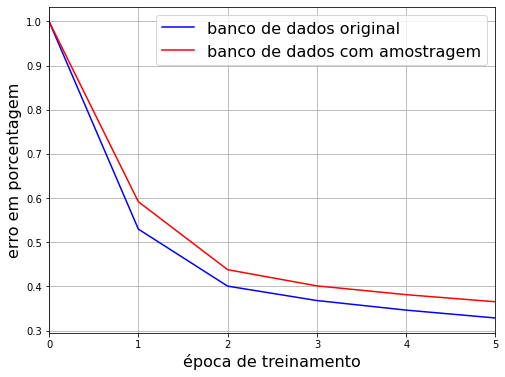

In [ ]:
loss_modificada = [1, 0.5917, 0.4378, 0.4011,0.3812,0.3651]
loss_normal = [1, 0.5297, 0.4005, 0.3679, 0.3462, 0.3284]
epochs = np.linspace(0,5,6)
fig1 = plt.figure(figsize=(8,6))
plt.plot(epochs, loss_normal, label = 'banco de dados original', color = 'b')
plt.plot(epochs, loss_modificada, label = 'banco de dados com amostragem', color = 'r')
plt.xlabel('época de treinamento', fontsize = 16)
plt.ylabel('erro em porcentagem', fontsize = 16)
plt.xlim([0,5])
#plt.ylim([0,1])
plt.legend(fontsize = 16)
plt.grid(True)


Agora vamos usar os dados de teste

In [ ]:
test_loss, test_accuracy = model.evaluate(mod_X_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [ ]:
print("Test accuracy: {}".format(test_accuracy))

Test accuracy: 0.8791999816894531


In [ ]:
test_loss

0.3422316609621048